In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
# load train.csv
train_filedata=pd.read_csv("train.csv")
train_filedata

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_filedata=pd.read_csv("test.csv")
test_filedata

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_x=np.array(train_filedata.drop(columns=['label']))
train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
train_y=np.array(train_filedata['label'])
train_y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [9]:
train_x.shape

(42000, 784)

In [10]:
train_y.shape

(42000,)

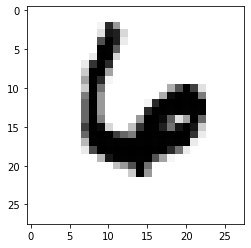

In [11]:
# As each image is a 28X28 
plt.imshow(train_x[21000].reshape(28,28), cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.show()

In [12]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
x_train, x_test,y_train,y_test=train_test_split(train_x,train_y, test_size=.4,random_state=10)

random_class=RandomForestClassifier(n_estimators=100,n_jobs=1,criterion='gini')
random_class.fit(x_train,y_train)


Wall time: 17.1 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [13]:
%%time
train_data_res=cross_val_predict(random_class,x_train,y_train)

Wall time: 1min 8s


In [14]:
train_data_res.shape

(25200,)

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                                classification_report, confusion_matrix
print(f1_score(y_train, train_data_res, average="macro"))
print(precision_score(y_train, train_data_res, average="macro"))
print(recall_score(y_train, train_data_res, average="macro"))

0.9571928448360673
0.9571701983353496
0.957264167967319


In [16]:
%%time
train_test_data_res=cross_val_predict(random_class,x_test,y_test)

Wall time: 36.5 s


In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                                classification_report, confusion_matrix
print(f1_score(y_test, train_test_data_res, average="macro"))
print(precision_score(y_test, train_test_data_res, average="macro"))
print(recall_score(y_test, train_test_data_res, average="macro"))

0.9547996286651548
0.9547767509175935
0.9548745488911677


In [18]:
test_res=random_class.predict(test_filedata)
np.savetxt('ramdomforest.csv', 
           np.c_[range(1,len(test_filedata)+1),test_res], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [19]:
#merge train and test 
result_data=np.concatenate([train_x, test_filedata.values], axis=0)
result_data.shape

(70000, 784)

In [20]:
#%%time
from sklearn.decomposition import PCA

#pca=PCA(0.95)
#pca.fit(result_data)

In [ ]:
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#pca_comp=cumsum.shape
#pca_comp

In [21]:
%%time
pca_comp=154
new_pca=PCA(pca_comp)


Wall time: 0 ns


In [23]:
red_train_x=new_pca.fit_transform(train_x)
red_train_x.shape

(42000, 154)

In [24]:
%%time

red_x_train, red_x_test,red_y_train,red_y_test=train_test_split(red_train_x,train_y, test_size=.4,random_state=10)

new_random_class=RandomForestClassifier(n_estimators=pca_comp,n_jobs=1,criterion='gini')
new_random_class.fit(red_x_train,red_y_train)


Wall time: 48 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=154, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [25]:
%%time
red_train_data_res=cross_val_predict(new_random_class,red_x_train,red_y_train)

Wall time: 3min 6s


In [26]:
red_train_data_res.shape

(25200,)

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                                classification_report, confusion_matrix
print(f1_score(red_y_train, red_train_data_res, average="macro"))
print(precision_score(red_y_train, red_train_data_res, average="macro"))
print(recall_score(red_y_train, red_train_data_res, average="macro"))

0.9352461382791146
0.9354533092921249
0.9351930302508874


In [28]:
%%time
red_train_test_data_res=cross_val_predict(new_random_class,red_x_test,red_y_test)

Wall time: 1min 53s


In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                                classification_report, confusion_matrix
print(f1_score(red_y_test, red_train_test_data_res, average="macro"))
print(precision_score(red_y_test, red_train_test_data_res, average="macro"))
print(recall_score(red_y_test, red_train_test_data_res, average="macro"))

0.9298305314214381
0.9300353110326315
0.9297334496093594


In [32]:
red_test_val=np.array(test_filedata)
red_test_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
red_test=new_pca.fit_transform(red_test_val)
red_test.shape

(28000, 154)

In [37]:
red_test_res=new_random_class.predict(red_test)
np.savetxt('pca_ramdomforest.csv', 
           np.c_[range(1,len(red_test)+1),red_test_res], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')